In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Fraud_check.csv')

In [3]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
data.shape

(600, 6)

In [5]:
data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [7]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [8]:
data[data.duplicated()].any(axis=0)

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

In [9]:
categorical=[var for var in data.columns if data[var].dtypes=="object"]
categorical

['Undergrad', 'Marital.Status', 'Urban']

(array([[288.,   0., 312.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0., 217.,   0., 189.,   0., 194.],
        [298.,   0., 302.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 3 BarContainer objects>)

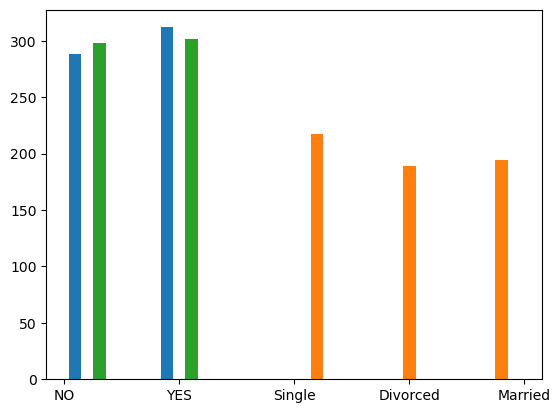

In [10]:
plt.hist(data[categorical],histtype='bar')

In [11]:
for col in data[categorical]:
    print(f'The value count of {col}:\n')
    print(data[col].value_counts())
    print("")

The value count of Undergrad:

YES    312
NO     288
Name: Undergrad, dtype: int64

The value count of Marital.Status:

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

The value count of Urban:

YES    302
NO     298
Name: Urban, dtype: int64



In [12]:
data["Taxable.Income"]=(data["Taxable.Income"]>30000)*1

In [13]:
numerical=[var for var in data.columns if data[var].dtypes!="object"]
numerical

['Taxable.Income', 'City.Population', 'Work.Experience']

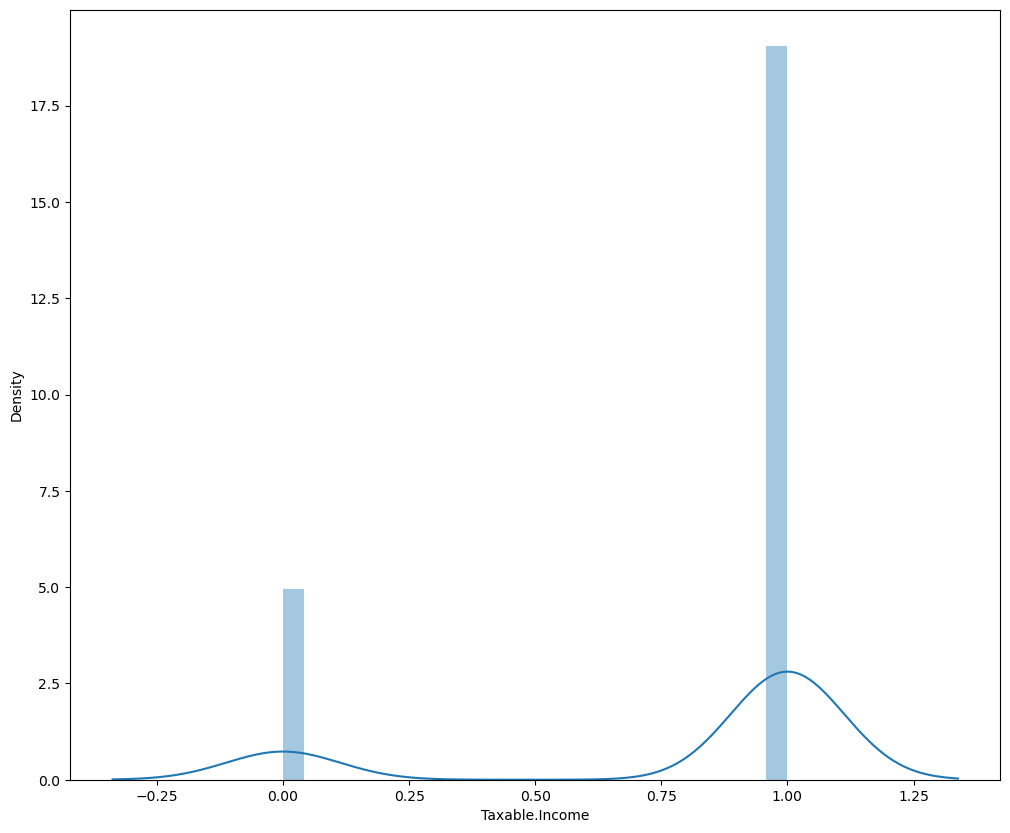

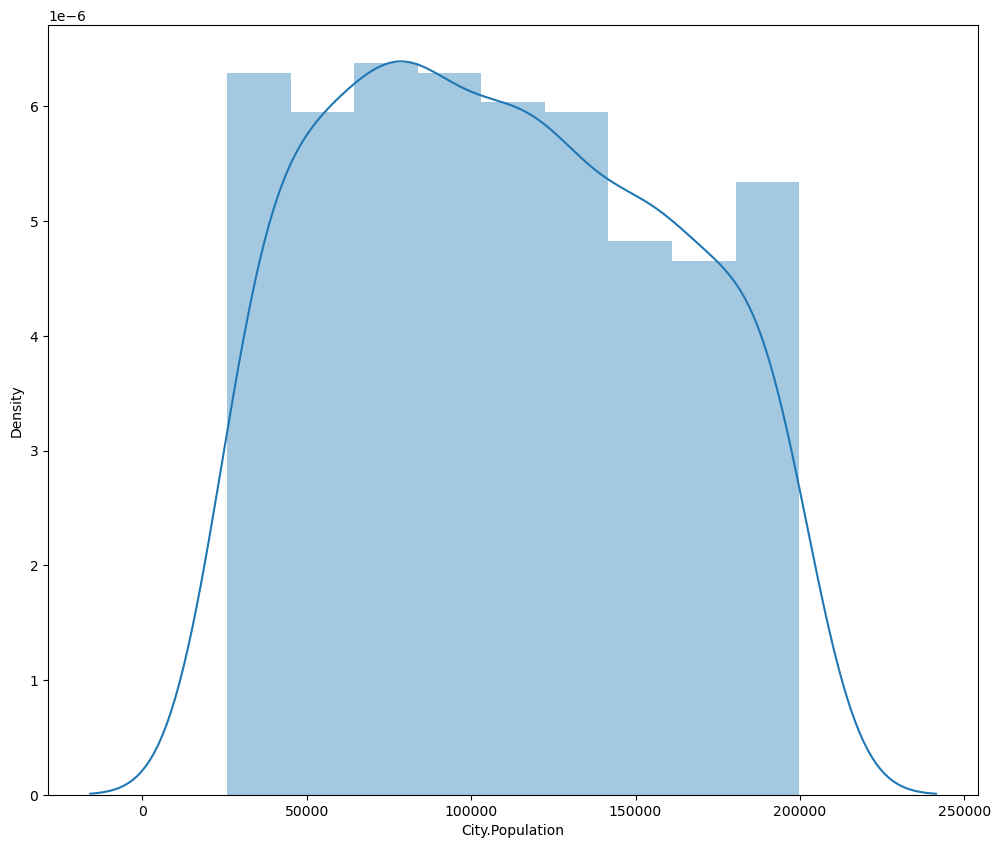

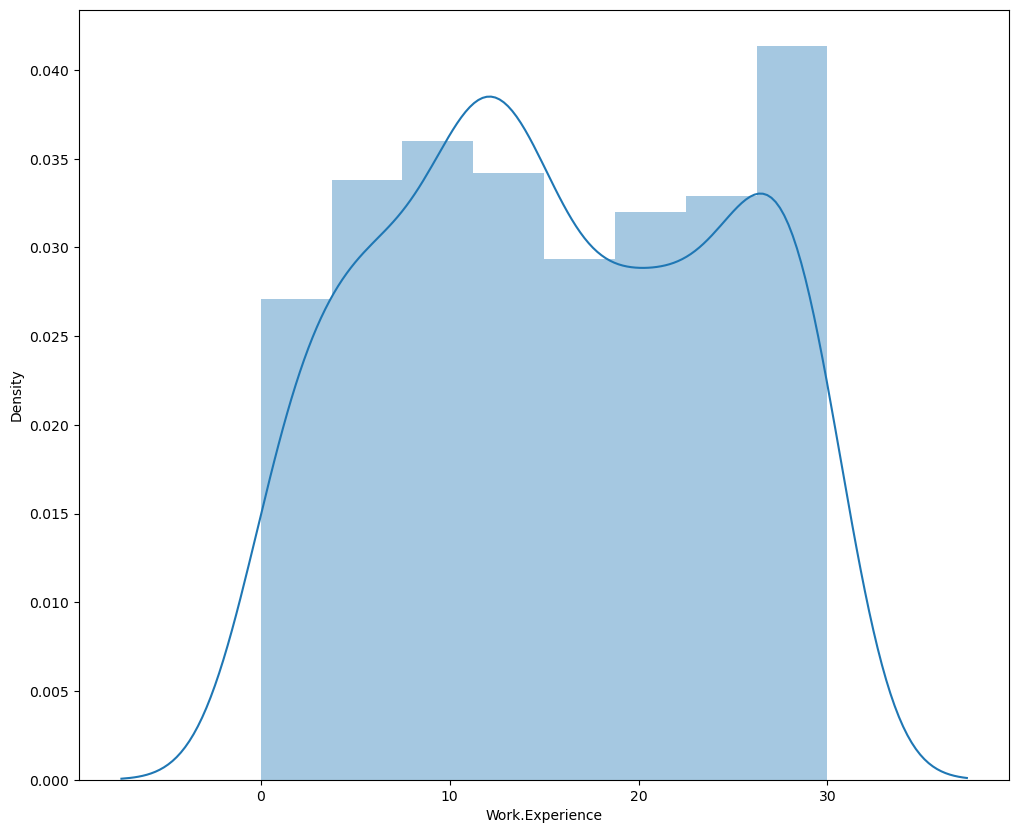

In [14]:
for var in data[numerical]:
    plt.figure(figsize=(12,10))
    sns.distplot(data[var])

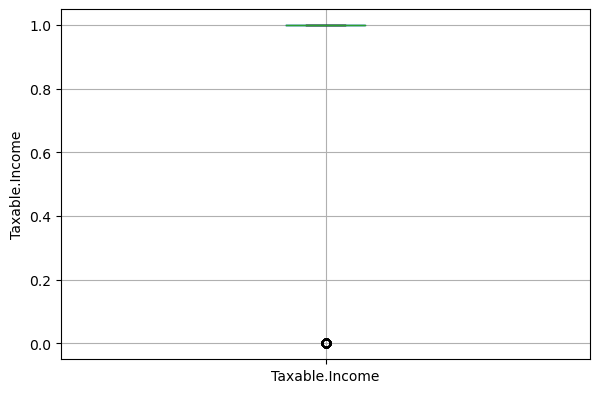

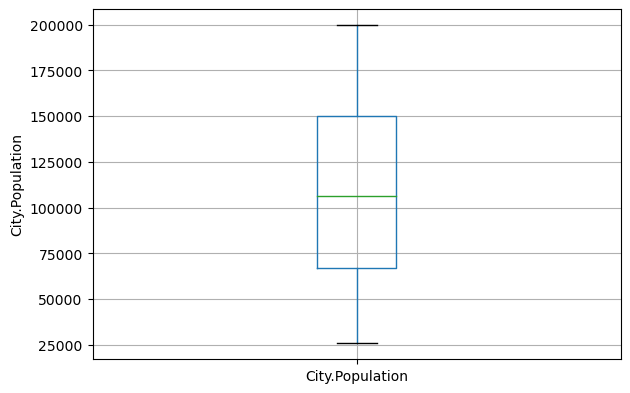

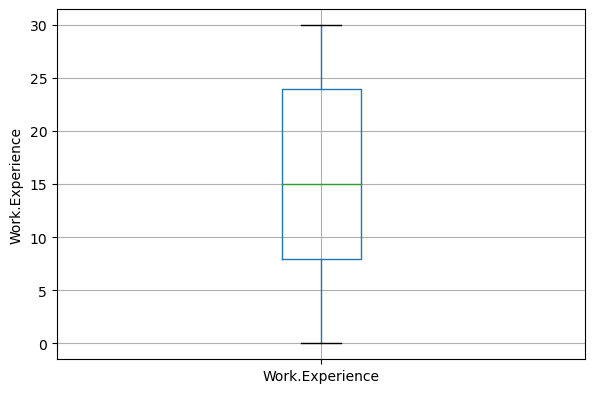

In [15]:
i=0
for var in numerical:
    plt.figure(figsize=(15,10))

    plt.subplot(2,2, i+1)
    fig = data.boxplot(column=var)
    fig.set_ylabel(var)

Taxable.Income


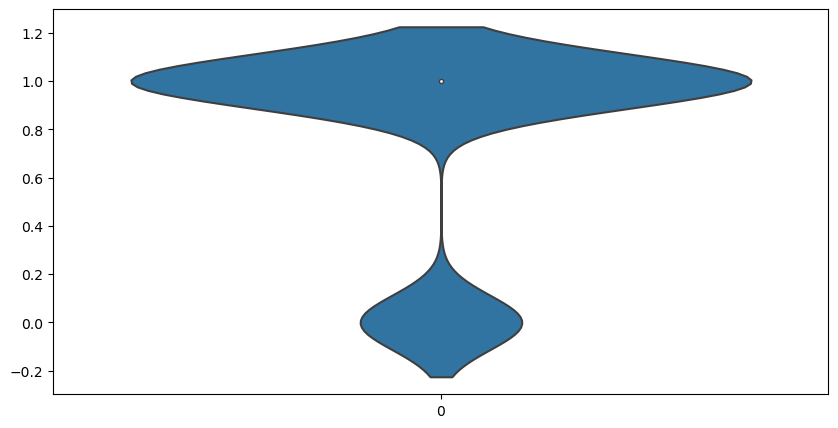

City.Population


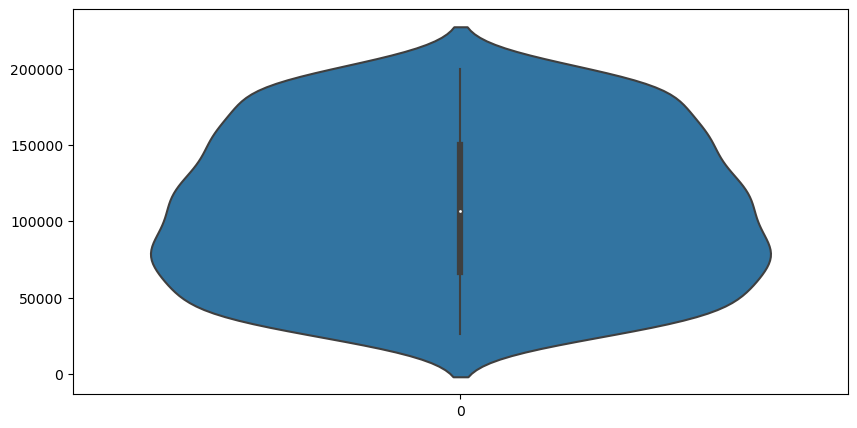

Work.Experience


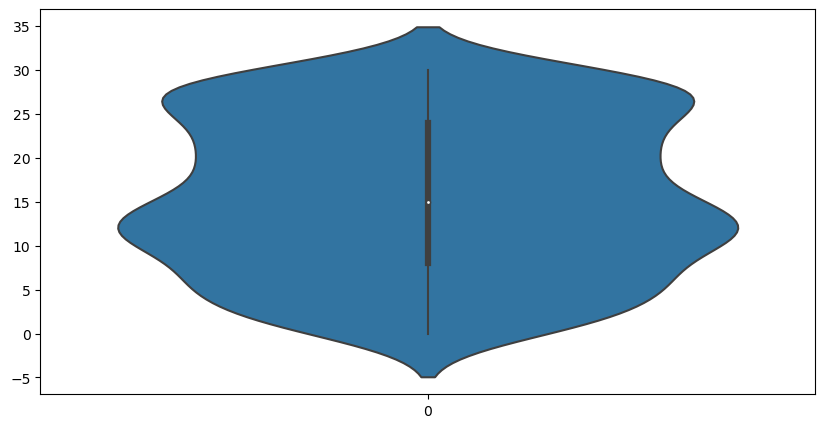

In [16]:
for col in numerical:
    plt.figure(figsize = (10,5))
    ax= sns.violinplot(data[col],scale="area")
    print(col)
    plt.show()

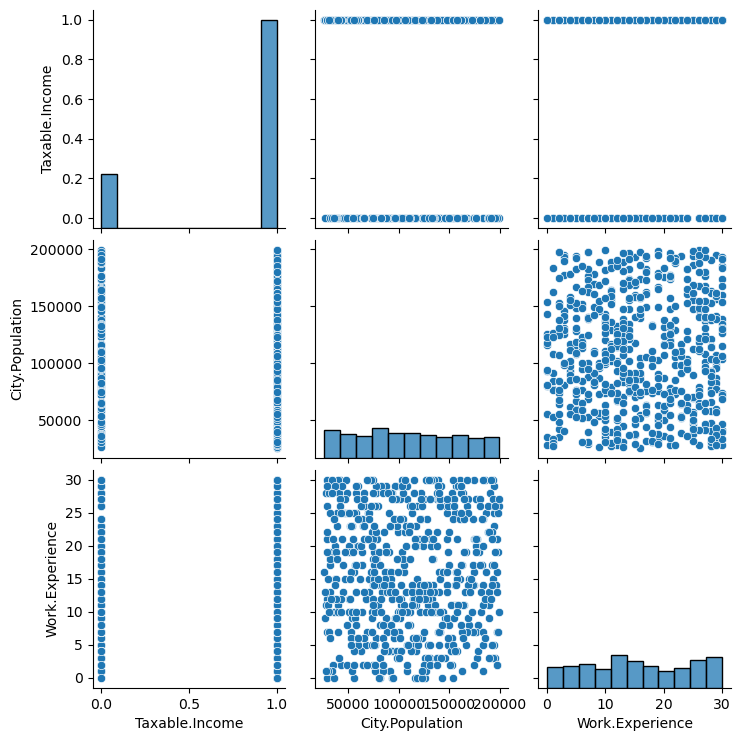

In [17]:
# pairplot
sns.pairplot(data,x_vars=numerical,y_vars=numerical)

In [18]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,0.793333,108747.368333,15.558333
std,0.405252,49850.075134,8.842147
min,0.000000,25779.000000,0.000000
25%,1.000000,66966.750000,8.000000
50%,1.000000,106493.500000,15.000000
75%,1.000000,150114.250000,24.000000
max,1.000000,199778.000000,30.000000


In [19]:
data.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.012225,0.001972
City.Population,-0.012225,1.000000,0.013135
Work.Experience,0.001972,0.013135,1.000000


<Axes: >

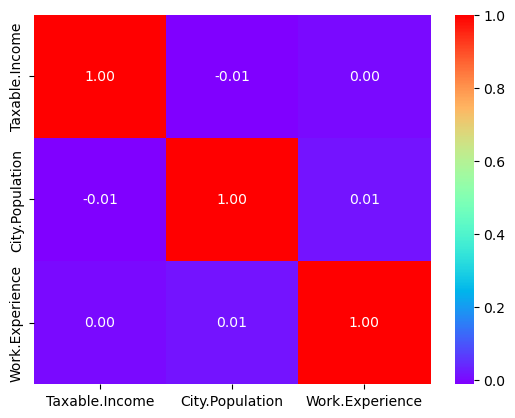

In [20]:
sns.heatmap(data.corr(),annot=True,fmt='0.2f',cmap='rainbow')

In [21]:
data=pd.get_dummies(data,columns=['Undergrad','Marital.Status','Urban'],drop_first=True)

In [22]:
data.head(3)

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,1,50047,10,0,0,1,1
1,1,134075,18,1,0,0,1
2,1,160205,30,0,1,0,1


In [23]:
X=data.drop('Taxable.Income',axis=1)
y=data['Taxable.Income']

## feature Selection

In [24]:
from sklearn.feature_selection import SelectKBest,chi2

feature=SelectKBest(chi2,k=3)
scaled_feature=feature.fit_transform(X,y)

In [25]:
X=scaled_feature

In [26]:
# split data into separate training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [27]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((480, 3), (120, 3), (480,), (120,))

In [28]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [29]:
snd=StandardScaler()
X_train=snd.fit_transform(X_train)
X_test=snd.transform(X_test)

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
model = DecisionTreeClassifier(criterion = 'gini',min_samples_split=5,max_leaf_nodes=20)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=20, min_samples_split=5)

In [32]:
y_pred=model.predict(X_test)

In [33]:
from sklearn import tree
fig = plt.figure(figsize=(35,30),dpi=300)
tree.plot_tree(model)

[Text(0.5, 0.9615384615384616, 'x[0] <= 0.661\ngini = 0.322\nsamples = 480\nvalue = [97, 383]'),
 Text(0.34615384615384615, 0.8846153846153846, 'x[0] <= 0.651\ngini = 0.343\nsamples = 341\nvalue = [75, 266]'),
 Text(0.2692307692307692, 0.8076923076923077, 'x[0] <= -0.891\ngini = 0.338\nsamples = 339\nvalue = [73, 266]'),
 Text(0.19230769230769232, 0.7307692307692307, 'gini = 0.257\nsamples = 112\nvalue = [17, 95]'),
 Text(0.34615384615384615, 0.7307692307692307, 'x[0] <= -0.871\ngini = 0.372\nsamples = 227\nvalue = [56, 171]'),
 Text(0.2692307692307692, 0.6538461538461539, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.4230769230769231, 0.6538461538461539, 'x[0] <= -0.717\ngini = 0.358\nsamples = 223\nvalue = [52, 171]'),
 Text(0.34615384615384615, 0.5769230769230769, 'gini = 0.105\nsamples = 18\nvalue = [1, 17]'),
 Text(0.5, 0.5769230769230769, 'x[0] <= -0.71\ngini = 0.374\nsamples = 205\nvalue = [51, 154]'),
 Text(0.4230769230769231, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]

In [34]:
model.score(X_train,y_train)

0.84375

In [35]:
model.score(X_test,y_test)

0.7166666666666667

In [36]:
from sklearn.metrics import accuracy_score,classification_report

In [37]:
accuracy_score(y_test,y_pred)

0.7166666666666667

In [38]:
data['Taxable.Income'].value_counts()

1    476
0    124
Name: Taxable.Income, dtype: int64

In [39]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred)
cm

array([[ 0, 27],
       [ 7, 86]], dtype=int64)

<Axes: >

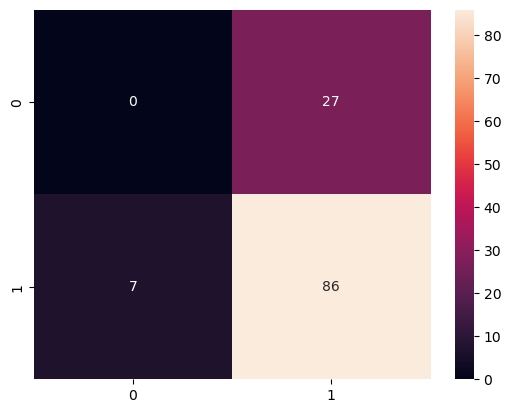

In [40]:
sns.heatmap(cm,annot=True)

In [41]:
from sklearn.metrics import classification_report

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.76      0.92      0.83        93

    accuracy                           0.72       120
   macro avg       0.38      0.46      0.42       120
weighted avg       0.59      0.72      0.65       120



In [43]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [44]:
# Create the parameter grid based on the results of random search 
param={
    'criterion':['gini','entropy','log-loss'],
    'splitter':["best", "random"],
    'max_depth':range(1,15)
}

In [45]:
# Instantiate the grid search model
grid=GridSearchCV(model,param_grid=param,cv=5,n_jobs=-1, verbose=1, scoring = "accuracy")

In [46]:
%%time
grid.fit(X_train,y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
CPU times: total: 250 ms
Wall time: 5.99 s


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_leaf_nodes=20,
                                              min_samples_split=5),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log-loss'],
                         'max_depth': range(1, 15),
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=1)

In [47]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=1, max_leaf_nodes=20, min_samples_split=5,
                       splitter='random')

In [48]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 1, 'splitter': 'random'}

In [49]:
grid.best_score_

0.7979166666666666

In [50]:
y_pred=grid.predict(X_test)

In [51]:
accuracy_score(y_test,y_pred)

0.775

In [52]:
score_df=pd.DataFrame(grid.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006458,0.007700,0.000000,0.000000,gini,1,best,"{'criterion': 'gini', 'max_depth': 1, 'splitte...",0.802083,0.791667,0.802083,0.791667,0.791667,0.795833,0.005103,6
1,0.000000,0.000000,0.000000,0.000000,gini,1,random,"{'criterion': 'gini', 'max_depth': 1, 'splitte...",0.802083,0.802083,0.802083,0.791667,0.791667,0.797917,0.005103,1
2,0.000000,0.000000,0.003237,0.006475,gini,2,best,"{'criterion': 'gini', 'max_depth': 2, 'splitte...",0.802083,0.791667,0.802083,0.791667,0.791667,0.795833,0.005103,6
3,0.003106,0.006211,0.003106,0.006211,gini,2,random,"{'criterion': 'gini', 'max_depth': 2, 'splitte...",0.802083,0.802083,0.802083,0.791667,0.791667,0.797917,0.005103,1
4,0.003341,0.006423,0.000000,0.000000,gini,3,best,"{'criterion': 'gini', 'max_depth': 3, 'splitte...",0.781250,0.791667,0.791667,0.791667,0.770833,0.785417,0.008333,19


In [53]:
# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv=RandomizedSearchCV(estimator=model,param_distributions=param,cv=10,random_state=42)

In [54]:
tree_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=10,
                   estimator=DecisionTreeClassifier(max_leaf_nodes=20,
                                                    min_samples_split=5),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log-loss'],
                                        'max_depth': range(1, 15),
                                        'splitter': ['best', 'random']},
                   random_state=42)

In [55]:
tree_cv.best_estimator_,tree_cv.best_params_

(DecisionTreeClassifier(max_depth=1, max_leaf_nodes=20, min_samples_split=5),
 {'splitter': 'best', 'max_depth': 1, 'criterion': 'gini'})

In [56]:
tree_cv.best_score_

0.7958333333333334

In [57]:
tree_cv.get_params

<bound method BaseEstimator.get_params of RandomizedSearchCV(cv=10,
                   estimator=DecisionTreeClassifier(max_leaf_nodes=20,
                                                    min_samples_split=5),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log-loss'],
                                        'max_depth': range(1, 15),
                                        'splitter': ['best', 'random']},
                   random_state=42)>

In [58]:
Score=pd.DataFrame(tree_cv.cv_results_)
Score.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_splitter,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003125,0.006250,0.0,0.0,random,9,log-loss,"{'splitter': 'random', 'max_depth': 9, 'criter...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
1,0.001563,0.004688,0.0,0.0,best,1,gini,"{'splitter': 'best', 'max_depth': 1, 'criterio...",0.812500,0.812500,...,0.770833,0.791667,0.791667,0.791667,0.791667,0.791667,0.791667,0.795833,0.012500,1
2,0.000000,0.000000,0.0,0.0,best,2,log-loss,"{'splitter': 'best', 'max_depth': 2, 'criterio...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
3,0.001562,0.004687,0.0,0.0,best,12,gini,"{'splitter': 'best', 'max_depth': 12, 'criteri...",0.791667,0.812500,...,0.729167,0.687500,0.750000,0.791667,0.770833,0.770833,0.729167,0.760417,0.035171,6
4,0.001562,0.004687,0.0,0.0,best,7,gini,"{'splitter': 'best', 'max_depth': 7, 'criterio...",0.791667,0.791667,...,0.729167,0.729167,0.770833,0.791667,0.791667,0.812500,0.729167,0.772917,0.030118,3


In [59]:
y_pred=tree_cv.predict(X_test)

In [60]:
accuracy_score(y_test,y_pred)

0.775

## Build Random forest model

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
clf=RandomForestClassifier()

clf.fit(X_train,y_train)

RandomForestClassifier()

In [63]:
# predict the mode
y_pred = clf.predict(X_test)

In [64]:
# performance evaluatio metrics
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.12      0.11      0.12        27
           1       0.75      0.77      0.76        93

    accuracy                           0.62       120
   macro avg       0.44      0.44      0.44       120
weighted avg       0.61      0.62      0.62       120



In [66]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': range(1,10),
    'max_leaf_nodes': range(1,10),
}

In [67]:
grid_search = GridSearchCV(clf,param_grid=param_grid)

grid_search.fit(X_train, y_train)

print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=1, max_leaf_nodes=2, n_estimators=25)


In [68]:
random_search = RandomizedSearchCV(clf,param_distributions=param_grid,random_state=42)
random_search.fit(X_train, y_train)

print(random_search.best_estimator_)

RandomForestClassifier(max_depth=8, max_leaf_nodes=3, n_estimators=150)


In [85]:
model_random = RandomForestClassifier(max_depth=8,
                                      max_features='log2',
                                      max_leaf_nodes=8,
                                      n_estimators=50)
model_random.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, max_features='log2', max_leaf_nodes=8,
                       n_estimators=50)

In [86]:
y_pred_rand = model_random.predict(X_test)

In [87]:
print(classification_report(y_test,y_pred_rand))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.78      1.00      0.87        93

    accuracy                           0.78       120
   macro avg       0.39      0.50      0.44       120
weighted avg       0.60      0.78      0.68       120



## Bagging

In [88]:
from sklearn.ensemble import BaggingClassifier

In [90]:
bg=BaggingClassifier()
bagging= BaggingClassifier(base_estimator=model, n_estimators=1500, random_state=42)
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_leaf_nodes=20,
                                                        min_samples_split=5),
                  n_estimators=1500, random_state=42)

In [91]:
scores = {
    'Bagging Classifier': {
        'Train': accuracy_score(y_train, bagging.predict(X_train)),
        'Test': accuracy_score(y_test, bagging.predict(X_test)),
    }
}

In [92]:
scores

{'Bagging Classifier': {'Train': 0.8145833333333333,
  'Test': 0.7666666666666667}}

In [93]:
print(classification_report(y_test, bagging.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.77      0.99      0.87        93

    accuracy                           0.77       120
   macro avg       0.39      0.49      0.43       120
weighted avg       0.60      0.77      0.67       120



## Boosting

In [95]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier(base_estimator=model,n_estimators=30)
ada_boost_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_leaf_nodes=20,
                                                         min_samples_split=5),
                   n_estimators=30)

In [96]:
scores= {
        'Train': accuracy_score(y_train, ada_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, ada_boost_clf.predict(X_test)),
    }

In [97]:
scores

{'Train': 1.0, 'Test': 0.625}

In [98]:
print(classification_report(y_test, ada_boost_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.05      0.04      0.04        27
           1       0.74      0.80      0.77        93

    accuracy                           0.62       120
   macro avg       0.40      0.42      0.40       120
weighted avg       0.58      0.62      0.60       120

